In [1]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.1
    Uninstalling pydantic-2.7.1:
      Successfully uninstalled pydantic-2.7.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [2]:
# import antigranular as ag
# ag_client  = ag.login(<client_id>,<client_secret>, "comp_dataset_id", "temp_username", "temp_password")
import antigranular as ag
session = ag.login(<client_id>,<client_secret>, dataset = "The Wine Dataset")

Dataset "The Wine Dataset" loaded to the kernel as the_wine_dataset
Key Name                       Value Type     
---------------------------------------------
train_x                        PrivateDataFrame
train_y                        PrivateDataFrame
test_x                         DataFrame      

Connected to Antigranular server session id: 68a5e04c-c2dd-4ea2-8d36-a4e887fce54c, the session will time out if idle for 25 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


In [3]:
%%ag
from op_pandas import PrivateDataFrame , PrivateSeries
from ag_utils import load_dataset, export

response=load_dataset('The Wine Dataset')
train_x= response ['train_x']
train_y= response['train_y']
test_x=response ['test_x']
# test_y=response['test_y']

Dataset "The Wine Dataset" loaded to the kernel as the_wine_dataset
Key Name                       Value Type     
---------------------------------------------
train_x                        PrivateDataFrame
train_y                        PrivateDataFrame
test_x                         DataFrame      



In [4]:
%%ag
avg=train_x['alcohol'].mean(eps=0.1)
export(avg,'avg')

Setting up exported variable in local environment: avg


In [5]:
print(avg)

13.483259276236081


In [10]:
%%ag
priv_describe = train_x.describe(eps=1)
export(priv_describe , 'df_info')

Setting up exported variable in local environment: df_info


In [11]:
print(df_info)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  200.000000  256.000000  155.000000         136.000000  513.000000   
mean    14.008630    0.740000    3.230000          30.000000   70.000000   
std      0.371837    2.308889    0.718799           8.319431   35.981572   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     11.042886    1.450850    2.463097          14.578449  112.817448   
50%     13.211256    5.091904    3.112246          16.711656  129.424410   
75%     12.529072    5.523704    1.906676          26.988424  107.782573   
max     13.158721    2.633033    3.059585          25.970621  160.211761   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     287.000000   69.000000            155.000000         0.000000   
mean        1.668197    5.080000              0.130000         0.410000   
std         0.826124    0.966190              0.225096         0.698588   
min         0.9

In [14]:
%%ag
train_data = train_x.join(train_y , how="left")
export(train_data.describe(eps=1) , 'result')

Setting up exported variable in local environment: result


In [15]:
print(result)

          alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
count  184.000000    0.000000  0.000000         258.000000    0.000000   
mean    11.972435    0.740000  2.446173          25.486075  162.000000   
std      1.531860    0.825587  0.394117           8.749614   28.435620   
min     11.030000    0.740000  1.360000          10.600000   70.000000   
25%     11.738033    1.147257  1.360572          23.703183   84.597524   
50%     14.404578    5.552095  1.648922          15.953424   89.458014   
75%     11.421789    0.952048  1.500110          14.584359  125.303691   
max     14.490835    4.083038  3.227413          25.654075  107.993587   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     230.000000  153.000000             62.000000       178.000000   
mean        3.880000    3.771573              0.660000         0.410000   
std         1.091974    1.752512              0.074207         0.560217   
min         0.980000    0.340000 

In [16]:
%%ag
export(train_data.dropna(axis=0).describe(eps=1), 'result')

Setting up exported variable in local environment: result


In [17]:
print(result)

         alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count   0.000000   51.000000  62.000000         116.000000   73.000000   
mean   11.030000    0.740000   1.677899          18.496692  122.234490   
std     1.797543    0.710619   0.922945           4.445848   41.418244   
min    11.030000    0.740000   1.360000          10.600000   70.000000   
25%    12.177833    1.213801   3.186034          11.874204   80.316328   
50%    14.827405    4.478286   2.539092          15.004847   86.269616   
75%    13.340403    4.118045   1.457962          23.541534  153.423761   
max    13.666232    5.465356   1.648855          24.346260  147.738517   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     130.000000  163.000000            245.000000         0.000000   
mean        2.048868    0.340000              0.617653         0.460427   
std         1.141665    1.894287              0.228160         1.514740   
min         0.980000    0.340000 

In [18]:
%%ag
export(train_data.columns, "columns")

Setting up exported variable in local environment: columns


In [19]:
print(columns)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', '0D280_0D315_of_diluted_wines', 'proline', 'cultivars']


In [21]:
%%ag
columns=list(train_data.columns)
ranges=[(11.03 , 14.83),(0.74 , 5.8),(1.36 , 3.23),(10.6 , 30),(70 ,162),(0.98 , 3.88), (0.34 , 5.08),(0.13 , 0.66),(0.41, 3.58),(1.28 ,13),(0.48 , 1.71),(1.27 ,4),(278 ,1680),(1 , 3)]
ranges=list(ranges)
assert len(columns) == len(ranges)

In [22]:
%%ag
priv_corr = train_x.corr(eps=5)
export(priv_corr , 'priv_corr')

/code/dependencies/op_pandas/op_pandas/utils/stat_utils.py:240: RuntimeWarning: invalid value encountered in sqrt
  ) / np.sqrt(



Setting up exported variable in local environment: priv_corr


<Axes: >

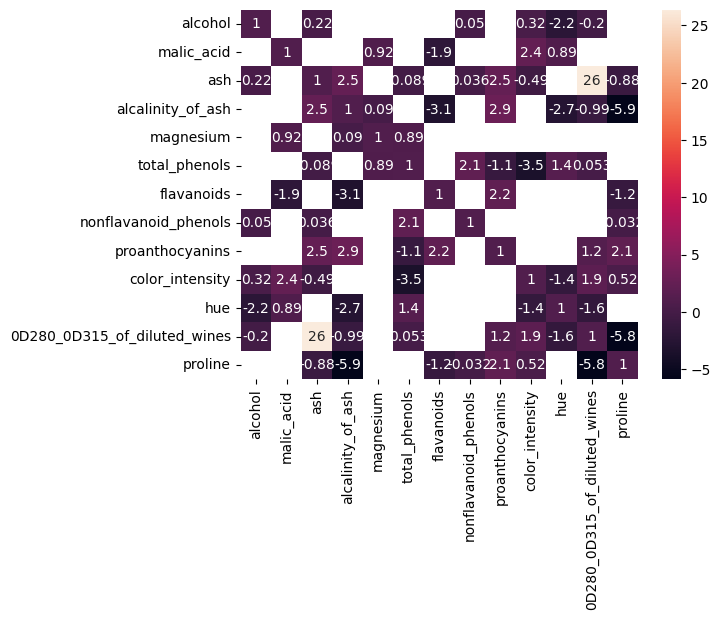

In [24]:
import pandas as pd
import seaborn as sns
result = priv_corr.apply(pd.to_numeric, errors='coerce').astype(float)
sns.heatmap(result , annot = True)

# GaussianNB

In [25]:
%%ag
import op_diffprivlib
from op_diffprivlib.models import  LogisticRegression, GaussianNB
bounds = ([11.03,0.74, 1.36, 10.6, 70,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278], [14.83, 5.8, 3.23, 30, 162,3.88,5.08,0.66,3.58,13,1.71,4,1680])
dp_clf2 = GaussianNB(epsilon=10, bounds=bounds, random_state=0)
dp_clf2.fit(train_x, train_y)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [26]:
%%ag
out=dp_clf2.predict(test_x)
export(out,'out')

Setting up exported variable in local environment: out


In [27]:
print(out)

[1 2 3 2 2 1 2 3 2 3 2 3 2 2 2 2 2 2 1 2 1 2 3 3 3 3 2 2 2 2 1 2 3 1 1 1]


# LogisticRegression

In [28]:
%%ag
from op_diffprivlib.models import  LogisticRegression
clf = LogisticRegression(data_norm=12, epsilon=10).fit(train_x, train_y)
prediction=clf.predict(test_x)
export(prediction,'predicted_value')

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Setting up exported variable in local environment: predicted_value


In [29]:
print(predicted_value)

[1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 1 2 1 2 1 1 2 1 1 1 1]


# RandomForest

In [30]:
%%ag
from op_diffprivlib.models import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, epsilon = 10 , random_state=0 , bounds=bounds , classes=list(train_x.columns))


In [31]:
%%ag
model.fit(train_x,train_y)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [32]:
%%ag
out = model.predict(test_x)
export(out , "out")

Setting up exported variable in local environment: out


In [33]:
print(out)

['malic_acid' 'malic_acid' 'nonflavanoid_phenols' 'alcalinity_of_ash'
 'malic_acid' 'alcohol' 'flavanoids' 'ash' 'nonflavanoid_phenols' 'ash'
 'malic_acid' '0D280_0D315_of_diluted_wines' 'total_phenols' 'ash'
 '0D280_0D315_of_diluted_wines' 'total_phenols' 'flavanoids'
 'nonflavanoid_phenols' 'nonflavanoid_phenols' 'hue' 'ash' 'malic_acid'
 'flavanoids' '0D280_0D315_of_diluted_wines' 'ash' 'ash' 'malic_acid'
 'nonflavanoid_phenols' 'total_phenols' 'nonflavanoid_phenols'
 'malic_acid' 'malic_acid' 'ash' 'nonflavanoid_phenols' 'malic_acid'
 'proline']
